# Training Log Analysis

## Prepare Data

Copy the training logs from the worker to the local machine

```bash
$ HOST=192.9.XXX.XX
$ scp "ubuntu@${HOST}:~/nano-gpt-ca-1/nano-gpt/train_*" . 
```

In [66]:
import pathlib

LOG_FILE_PATTERN = "train_*.log"

# Pick the most recent log file
log_file = list(sorted(pathlib.Path(".").glob(LOG_FILE_PATTERN)))[-1]
print(log_file)
lines = log_file.read_text().splitlines()
print(lines[-1])


train_2025-04-06_01-53-23.log
train: step: 19072 | loss: 3.0701 | norm: 0.3399 | dt: 8387.74ms | tok/sec: 62506.46 | lr: 0.000060


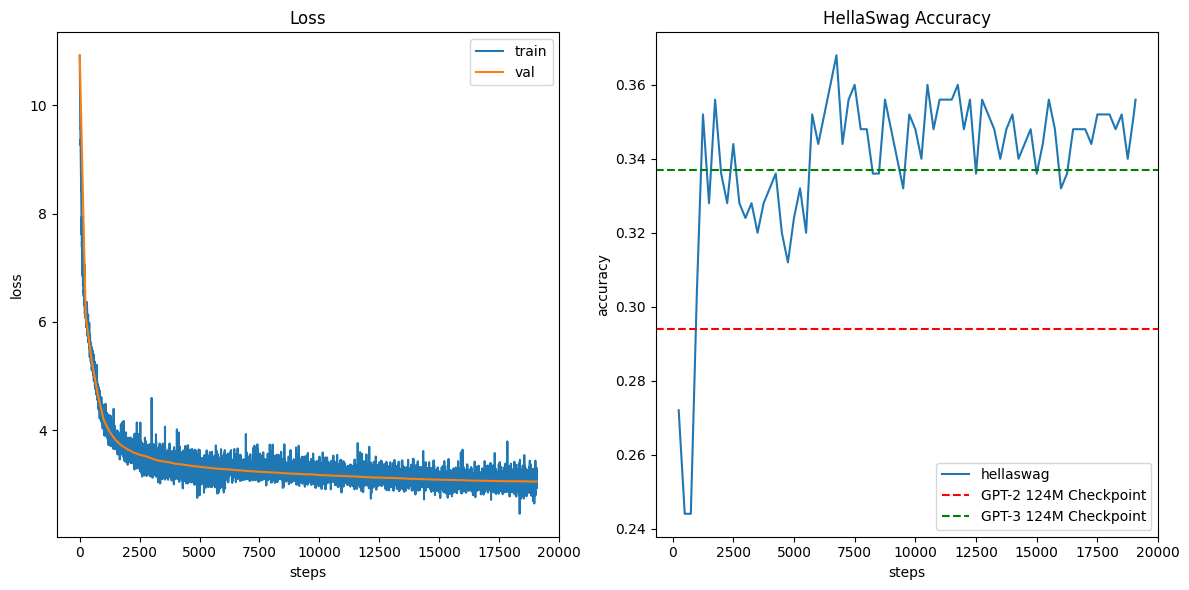

[250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000, 10250, 10500, 10750, 11000, 11250, 11500, 11750, 12000, 12250, 12500, 12750, 13000, 13250, 13500, 13750, 14000, 14250, 14500, 14750, 15000, 15250, 15500, 15750, 16000, 16250, 16500, 16750, 17000, 17250, 17500, 17750, 18000, 18250, 18500, 18750, 19000, 19072]
[0.272, 0.244, 0.244, 0.304, 0.352, 0.328, 0.356, 0.336, 0.328, 0.344, 0.328, 0.324, 0.328, 0.32, 0.328, 0.332, 0.336, 0.32, 0.312, 0.324, 0.332, 0.32, 0.352, 0.344, 0.352, 0.36, 0.368, 0.344, 0.356, 0.36, 0.348, 0.348, 0.336, 0.336, 0.356, 0.348, 0.34, 0.332, 0.352, 0.348, 0.34, 0.36, 0.348, 0.356, 0.356, 0.356, 0.36, 0.348, 0.356, 0.336, 0.356, 0.352, 0.348, 0.34, 0.348, 0.352, 0.34, 0.344, 0.348, 0.336, 0.344, 0.356, 0.348, 0.332, 0.336, 0.348, 0.348, 0.348, 0.344, 0.352, 0.352, 0.352, 0.348, 0

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


def to_number(value: str) -> float | int:
    """Convert a string to a number, handling both float and int formats."""
    if value.endswith("ms"):
        return float(value[:-2])
    if "." in value:
        return float(value)
    return int(value)


def extract_fields(data: str) -> dict[str, str]:
    """Extract fields from a string formatted as 'key1:value1|key2:value2'."""
    return {
        parts[0].strip(): to_number(parts[1].strip())
        for part in data.split("|")
        if (parts := part.split(":", maxsplit=2))
    }


val_steps = []
val_loss = []
train_steps = []
train_loss = []
hellaswag_steps = []
hellaswag_accuracy = []
step = 0
for line in lines:
    if line.startswith("train:"):
        data = extract_fields(line[7:])
        step = int(data["step"])
        train_steps.append(step)
        train_loss.append(float(data["loss"]))
    elif line.startswith("val:"):
        data = extract_fields(line[5:])
        step = int(data["step"])
        val_steps.append(step)
        val_loss.append(float(data["loss"]))
    elif line.startswith("hellaswag:"):
        data = extract_fields(line[11:])
        hellaswag_steps.append(step)
        hellaswag_accuracy.append(float(data["accuracy"]))

GPT2_HELLASWAG_ACCURACY = 29.4 / 100.0
GPT3_HELLASWAG_ACCURACY = 0.337

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_steps, train_loss, label="train")
plt.plot(val_steps, val_loss, label="val")
plt.xlabel("steps")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()

# Plot hellaswag accuracy
plt.subplot(1, 2, 2)
plt.plot(hellaswag_steps, hellaswag_accuracy, label="hellaswag")
plt.axhline(GPT2_HELLASWAG_ACCURACY, color="red", linestyle="--", label="GPT-2 124M Checkpoint")
plt.axhline(GPT3_HELLASWAG_ACCURACY, color="green", linestyle="--", label="GPT-3 124M Checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.title("HellaSwag Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

print(hellaswag_steps)
print(hellaswag_accuracy)